In [129]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import constants

plt.rcParams.update({"font.size":16, "axes.labelsize":16, "font.family":"sans-serif", 
                     "font.sans-serif":"Arial"})

Recall that in PHYS 207, you were often asked to plot displacement as a function of time. For example, for a baseball thrown directly upward you would plot $y(t)$, and for a block on a horizontal spring you would plot $x(t)$. Here we will examine how the displacement and time axes "scissor together" at relativistic speeds.

The convention in relativity is to reverse the axes: $ct$ is vertical and $x$ is horizontal. Time moves forward from the bottom to the top of the plot:

(-1.0, 1.0, -1.0, 1.0)

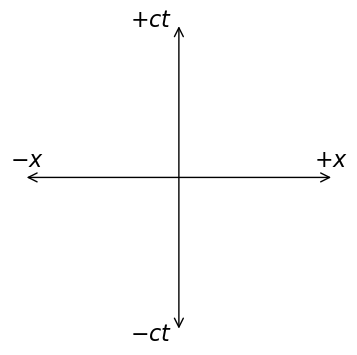

In [130]:
plt.figure(figsize=(4,4))
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.annotate(text='', xy=(-1,0), xytext=(1,0), arrowprops=dict(arrowstyle='<->'))
plt.annotate(text='', xy=(0,-1), xytext=(0,1), arrowprops=dict(arrowstyle='<->'))
plt.text(0.98, 0.04, r"$+x$", horizontalalignment='center', verticalalignment='bottom')
plt.text(-0.98, 0.04, r"$-x$", horizontalalignment='center', verticalalignment='bottom')
plt.text(-0.04, 1.02, r"$+ct$", horizontalalignment='right', verticalalignment='center')
plt.text(-0.04, -1.02, r"$-ct$", horizontalalignment='right', verticalalignment='center')
plt.axis('off')

Imagine that frame $K^{\prime}$ is moving in the $+x$ direction at speed $v$ relative to frame $K$. You are at rest in frame $K$. Let's figure out how the set of $(x^{\prime}, ct^{\prime})$ axes would look to you when the frames' origins $O$ and $O^{\prime}$ coincide.

<ol>
    <li>Use the fact that $x^{\prime} = 0$ on the $ct^{\prime}$ axis to define a line $ct(x)$ in frame $K$ that follows the $ct^{\prime}$ axis. Write a function that computes points on the line. $v$ will be one of your function inputs.</li>
</ol>

$x^{\prime} = \gamma(x-vt) = 0$
<br>
$x-vt = 0$
<br>
$x = vt$
<br>
$t = \frac{x}{v}$ --> $ct = \frac{c}{v}x$

In [131]:
def ct_prime_axis(x_values, v):
    """
    Computes points on a line that follows the ct' axis in frame K

    Parameters:
        x_values: array 
            array of x values to evaluate ct(x)
        v: float
            speed of the moving frame

    Returns: array
    """
    return (constants.c/v)*x_values

<ol start=2>
    <li>Use the fact that $ct^{\prime} = 0$ on the $x^{\prime}$ axis to define a line $ct(x)$ that traces the $x^{\prime}$ axis in frame $K$. Write a second function that computes points on this line.</li>
</ol>

$ct^{\prime} = c\gamma(t - \frac{vx}{c^2}) = 0$
<br>
$t - \frac{vx}{c^2} = 0$
<br>
$t = \frac{vx}{c^2}$
<br>
$ct = c\frac{vx}{c^2}$ --> $ct = \frac{v}{c}x$

In [136]:
def x_prime_axis(x_values, v):
    """
    Computes points on a line that follows the x' axis in frame K

    Parameters:
        x_values: array 
            array of x values to evaluate ct(x)
        v: float
            speed of the moving frame

    Returns: array
    """
    return (v/constants.c)*x_values

<ol start=3>
    <li>The code below creates a figure with centered $(x, ct)$ axes that have range $(-10^{10}, 10^{10})$ m. We are using $ct$ instead of just $t$ on our vertical axis so that both axes have the same units. Use your functions from problems 1 and 2 to overplot the $ct^{\prime}$ and $x^{\prime}$ axes <strong>as a function of $x$</strong> for $v = 0.2c$. Make your $ct^{\prime}$ and $x^{\prime}$ axes red, and label them in red. Also add black labels to the $(x, ct)$ axes giving the coordinate name ($x$ or $ct$) and the units.</li>
</ol>

Text(1000000000.0, -11000000000.0, '$-ct$ [m]')

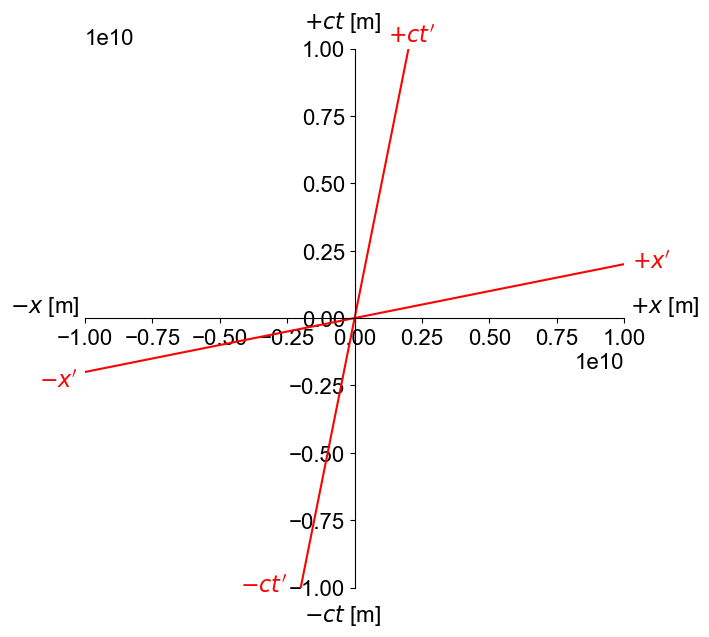

In [133]:
# Set up an array of independent variables x that spans (-1e10, 1e10) m
x = np.linspace(0, 2e10, num=201, endpoint=True) - 1e10

# Make a figure
fig, ax = plt.subplots(figsize=(7,7))

# YOUR CODE HERE: Use ax.plot() to plot the ct' and x' axes below
ax.plot(x, ct_prime_axis(x, 0.2*constants.c), 'r')
ax.plot(x, x_prime_axis(x, 0.2*constants.c), 'r')

# Move the left and bottom "spines" (borders of the plot) to the center
# This makes a math textbook-like set of (x,ct) axes instead of a box around the plot
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Take out the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Make the two axes have the same scale
ax.set_aspect('equal')

# Set the axes ranges
ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

# YOUR CODE HERE: Use ax.text() to add RED labels to the ct' and x' axes below
ax.text(1.1e10, 1.7e9, r"$+x^{\prime}$", horizontalalignment='center', verticalalignment='bottom', color='r')
ax.text(-1.1e10, -2.7e9, r"$-x^{\prime}$", horizontalalignment='center', verticalalignment='bottom', color='r')
ax.text(3e9, 1.05e10, r"$+ct^{\prime}$", horizontalalignment='right', verticalalignment='center', color='r')
ax.text(-2.5e9, -9.89e9, r"$-ct^{\prime}$", horizontalalignment='right', verticalalignment='center', color='r')

# Add labels to (x, ct)
ax.text(1.15e10, 0, r"$+x$ [m]", horizontalalignment='center', verticalalignment='bottom')
ax.text(-1.15e10, 0, r"$-x$ [m]", horizontalalignment='center', verticalalignment='bottom')
ax.text(1e9, 1.1e10, r"$+ct$ [m]", horizontalalignment='right', verticalalignment='center')
ax.text(1e9, -1.1e10, r"$-ct$ [m]", horizontalalignment='right', verticalalignment='center')

<ol start=4>
    <li>Make a figure that plots $ct^{\prime}$ and $x^{\prime}$ axes for $v = 0.25c$, $v = 0.5c$, and $v = 0.75c$. Use different colors for each pair of axes. Make a legend that shows which value of $v$ corresponds to each color. Label the $(x, ct)$ axes and add units.</li>
</ol>

Text(1000000000.0, -11000000000.0, '$-ct$ [m]')

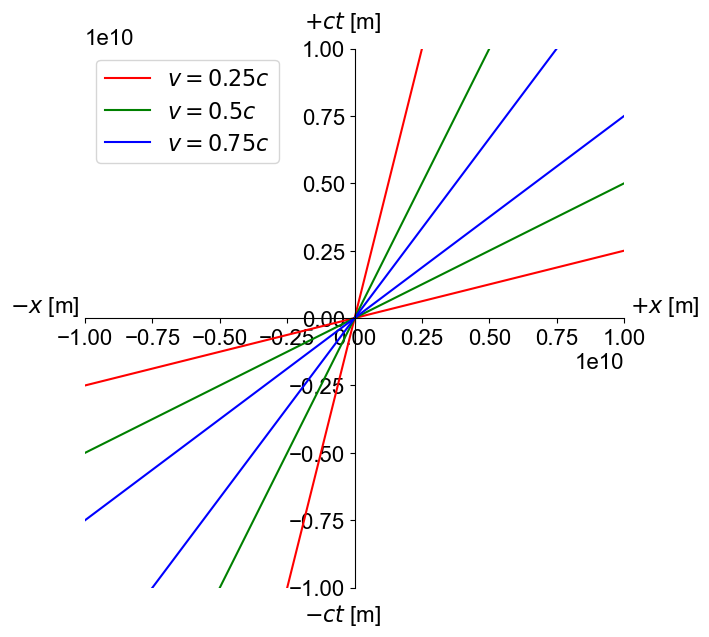

In [134]:
# Set up an array of independent variables x that spans (-1e10, 1e10) m
x = np.linspace(0, 2e10, num=201, endpoint=True) - 1e10

# Make a figure
fig, ax = plt.subplots(figsize=(7,7))

# YOUR CODE HERE: Use ax.plot() to plot the ct' and x' axes below
# v = 0.25c
ax.plot(x, ct_prime_axis(x, 0.25*constants.c), 'r', label='$v=0.25c$')
ax.plot(x, x_prime_axis(x, 0.25*constants.c), 'r')
# v = 0.5c
ax.plot(x, ct_prime_axis(x, 0.5*constants.c), 'g', label='$v=0.5c$')
ax.plot(x, x_prime_axis(x, 0.5*constants.c), 'g')
# v = 0.75c
ax.plot(x, ct_prime_axis(x, 0.75*constants.c), 'b', label='$v=0.75c$')
ax.plot(x, x_prime_axis(x, 0.75*constants.c), 'b')
ax.legend()

# Move the left and bottom "spines" (borders of the plot) to the center
# This makes a math textbook-like set of (x,ct) axes instead of a box around the plot
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Take out the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Make the two axes have the same scale
ax.set_aspect('equal')

# Set the axes ranges
ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

# Add labels to (x, ct)
ax.text(1.15e10, 0, r"$+x$ [m]", horizontalalignment='center', verticalalignment='bottom')
ax.text(-1.15e10, 0, r"$-x$ [m]", horizontalalignment='center', verticalalignment='bottom')
ax.text(1e9, 1.1e10, r"$+ct$ [m]", horizontalalignment='right', verticalalignment='center')
ax.text(1e9, -1.1e10, r"$-ct$ [m]", horizontalalignment='right', verticalalignment='center')

<ol start=5>
    <li>Connect your graph from problem 4 with the discussion of world lines in Chapter 2 of your textbook. What kind of world line do your $(x^{\prime}, ct^{\prime})$ axes approach as $v \rightarrow c$? Create a similar plot to problem 4, but this time plot $(x^{\prime}, ct^{\prime})$ axes for $v = 0.5, 0.75, 0.875, 0.9375$. To illustrate the concept of taking a limit as $v \rightarrow c$, make each set of $( x^{\prime}, ct^{\prime})$ axes a successively darker shade of gray. Plot the limiting world line in black. Add a legend to show which value of $v$ corresponds to which shade of gray. You may find it helpful to specify line colors like this: <tt>color='0.7'</tt>.</li>
</ol>

As $v \rightarrow c$, the $(x^{\prime}, ct^{\prime})$ axes approach a worldline with slope 1, creating a 45° angle with the $(x, ct)$ axes.

Text(1000000000.0, -11000000000.0, '$-ct$ [m]')

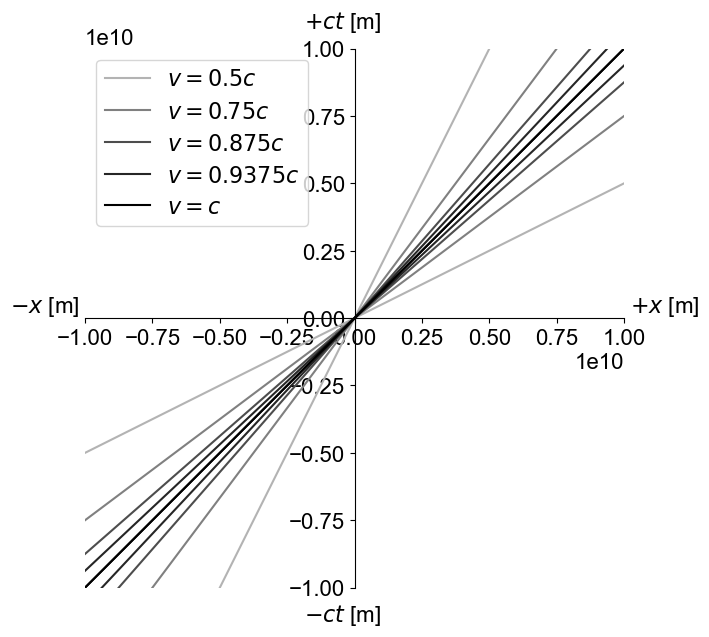

In [135]:
# Set up an array of independent variables x that spans (-1e10, 1e10) m
x = np.linspace(0, 2e10, num=201, endpoint=True) - 1e10

# Make a figure
fig, ax = plt.subplots(figsize=(7,7))

# YOUR CODE HERE: Use ax.plot() to plot the ct' and x' axes below
# v = 0.5c
ax.plot(x, ct_prime_axis(x, 0.5*constants.c), color='0.7', label='$v=0.5c$')
ax.plot(x, x_prime_axis(x, 0.5*constants.c), color='0.7')
# v = 0.75c
ax.plot(x, ct_prime_axis(x, 0.75*constants.c), color='0.5', label='$v=0.75c$')
ax.plot(x, x_prime_axis(x, 0.75*constants.c), color='0.5')
# v = 0.875c
ax.plot(x, ct_prime_axis(x, 0.875*constants.c), color='0.3', label='$v=0.875c$')
ax.plot(x, x_prime_axis(x, 0.875*constants.c), color='0.3')
# v = 0.9375c
ax.plot(x, ct_prime_axis(x, 0.9375*constants.c), color='0.15', label='$v=0.9375c$')
ax.plot(x, x_prime_axis(x, 0.9375*constants.c), color='0.15')
# v = c
ax.plot(x, ct_prime_axis(x, constants.c), color='k', label='$v=c$')
ax.plot(x, x_prime_axis(x, constants.c), color='k')
ax.legend()

# Move the left and bottom "spines" (borders of the plot) to the center
# This makes a math textbook-like set of (x,ct) axes instead of a box around the plot
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))

# Take out the top and right spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# Make the two axes have the same scale
ax.set_aspect('equal')

# Set the axes ranges
ax.set_xlim([-1e10, 1e10])
ax.set_ylim([-1e10, 1e10])

# Add labels to (x, ct)
ax.text(1.15e10, 0, r"$+x$ [m]", horizontalalignment='center', verticalalignment='bottom')
ax.text(-1.15e10, 0, r"$-x$ [m]", horizontalalignment='center', verticalalignment='bottom')
ax.text(1e9, 1.1e10, r"$+ct$ [m]", horizontalalignment='right', verticalalignment='center')
ax.text(1e9, -1.1e10, r"$-ct$ [m]", horizontalalignment='right', verticalalignment='center')